In [1]:
import os
import re
import collections

## Datasets

In [2]:
datasets = collections.defaultdict(lambda x: collections.defaultdict(list))

In [3]:
MIN_LENGTH = 1

### ReutersNews

In [4]:
ReutersNews = []
cnt = 0

folder_url = "../data/Motivation/ReutersNews106521"

folders = os.listdir(folder_url)

for folder in folders:
    if not os.path.isdir(os.path.join(folder_url, folder)):
        continue
            
    files = os.listdir(os.path.join(folder_url, folder))
    for file in files:
        cur_content = []
        for line in open(os.path.join(folder_url, folder, file)).readlines():
            if not line.startswith("-- ") and len(line.strip("\n")) > 0:
                cur_content.append(line.strip("\n"))
        ReutersNews.append(" ".join(cur_content))
        cnt += 1
        
print(cnt)

106519


In [7]:
ret_news = []
lines_ret_news = 0

for news in ReutersNews:
    splits = list(map(lambda x: x.strip(" "), news.split(". ")))
    ret_news.extend(list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, splits)))
    lines_ret_news += len(splits)


ret_news = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, ret_news))
total = len(ret_news)

print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(ret_news), 
                                                                      total - len(ret_news)))
datasets["ReutersNews"] = ret_news

len(ret_news), lines_ret_news


All: 2286423 | Filter by 1 | Remaining: 2286423 | Removed: 0. 


(2286423, 2286423)

### WMT-News

In [9]:


news_wmt = list(map(lambda x: x.strip("\n"), open("../data/Motivation/WMT-News.en-es.en").readlines()))
total = len(news_wmt)
print("total:", total)


news_wmt = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, news_wmt))
print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(news_wmt), 
                                                                      total - len(news_wmt)))

datasets["WMT-News"] = news_wmt



total: 14522
All: 14522 | Filter by 1 | Remaining: 14522 | Removed: 0. 


### commoncrawl

In [10]:
commoncrawl = list(map(lambda x: x.strip("\n"), open("../data/Motivation/commoncrawl.es-en.en").readlines()))
total = len(commoncrawl)

commoncrawl = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, commoncrawl))

print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(commoncrawl), 
                                                                      total - len(commoncrawl)))


datasets["Common Crawl"] = commoncrawl


All: 1845286 | Filter by 1 | Remaining: 1845286 | Removed: 0. 


### banking & finance law

In [11]:
banking = list(map(lambda x: x.strip("\n"), open("../data/Motivation/banking_finance.txt").readlines()))
banking = " ".join(banking).split(". ")

total = len(banking)
banking = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, banking))

print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(banking), 
                                                                      total - len(banking)))



All: 1870 | Filter by 1 | Remaining: 1870 | Removed: 0. 


### commentary

In [12]:
commentary = list(map(lambda x: x.strip("\n"), open("../data/Motivation/news-commentary-v8.es-en.en").readlines()))
commentary = " ".join(commentary).split(". ")
total = len(commentary)

commentary = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, commentary))

print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(commentary), 
                                                                      total - len(commentary)))

datasets["Commentary"] = commentary


All: 169437 | Filter by 1 | Remaining: 169437 | Removed: 0. 


### europarl-v7.es-en.en

In [13]:
europarl = list(map(lambda x: x.strip("\n"), open("../data/Motivation/europarl-v7.es-en.en").readlines()))
europarl = " ".join(europarl).split(". ")
total = len(europarl)

europarl = list(filter(lambda x: len(x.split(" ")) >= MIN_LENGTH, europarl))

print("All: {} | Filter by {} | Remaining: {} | Removed: {}. ".format(total, 
                                                                      MIN_LENGTH, 
                                                                      len(europarl), 
                                                                      total - len(europarl)))


datasets["Europarl"] = europarl
len(europarl)

All: 1932608 | Filter by 1 | Remaining: 1932608 | Removed: 0. 


1932608

## Keywords

In [14]:
# this
comparative_template1 = set(["\d+ times", "more than \d+", "greater than \d+", "larger than \d+", 
                               "greater than or equal to \d+", "smaller than or equal to \d+",
                               "less than \d+", "at least \d+", "at least once", "at most \d+","up to \d+", 
                               "\d+ or more", "\d+ or less",
                               "\d+ million", "\d+ thousand", "\d+ billion", "\d+ hundred",
                               "one","two","three","four","five","six","seven","eight","nine", "ten",
                              ])

part_whole_relations1 = set(["contain", "without", "includ[a-z]*", "exclud[a-z]*", "consist[a-z]* of"])

In [15]:
def statistics(datasets, quantity_pattern, logic_pattern):
    print(len(quantity_pattern), len(logic_pattern))
    for name, ds in datasets.items():
#         if name != "WMT-News":
#             continue
            
        hit_total = 0
        hit_q = 0
        hit_l = 0

        hit_q_list = []
        hit_l_list = []

        for i, new in enumerate(ds):
            new = new.lower()
            
            cur_hit_q = 0
            cur_hit_l = 0

            for q in quantity_pattern:
                hit = re.findall(r"\b{}\b".format(q), new.lower())
                if len(hit) > 0:
#                     print(hit, new)
                    cur_hit_q += 1
        
            hit_q_list.append(cur_hit_q) 
            hit_q += min(1, cur_hit_q)

            for l in logic_pattern:
                hit = re.findall(r"\b{}\b".format(l), new.lower())
                if len(hit) > 0:
                    cur_hit_l += 1
                    
            hit_l_list.append(cur_hit_l) 
            hit_l += min(1, cur_hit_l)

            hit_total += 1 if cur_hit_q > 0 or cur_hit_l > 0 else 0

        
        print(name, len(ds), hit_total, hit_total/len(ds), hit_q, hit_q/len(ds), sum(hit_q_list)/len(hit_q_list),
             hit_l, hit_l/len(ds), sum(hit_l_list)/len(hit_l_list))
        
statistics(datasets, comparative_template, part_whole_relations)



27 5
ReutersNews 2286423 490614 0.21457709269019776 427841 0.18712241785531375 0.21689687341318734 86185 0.037694249926632124 0.038026209498417396
WMT-News 14522 2652 0.18261947390166644 2290 0.15769177799201212 0.18613138686131386 468 0.032226965982647016 0.032502410136344854
Common Crawl 1845286 253537 0.13739712976741816 182685 0.0990009136795055 0.11121528044975142 80729 0.043748773902798806 0.04463589925897666
Commentary 169437 25019 0.14765960209399365 19808 0.11690480827682265 0.1307742700826856 5982 0.03530515766922219 0.03580091715504878
Europarl 1932608 251660 0.13021781965095872 187626 0.09708435440606683 0.1064100945458158 72055 0.0372838154452429 0.037807460178163395


## Count

In [203]:
ds = europarl   # news_wmt,  commoncrawl, ReutersNews,  ret_news, banking

selected = []

hit_cnt = 0
for i, new in enumerate(ds):
    for pattern in patterns:
        hit = re.findall(r"\b{}\b".format(pattern), new.lower())
        if len(hit) > 0:
#             print(i)
#             print(new)
#             print(hit)
            hit_cnt += 1
            selected.append(new)
            break
print(len(ds), hit_cnt)
print(hit_cnt/len(ds))

1718060 215496
0.12542984529061849


In [205]:
ds = europarl   # news_wmt,  commoncrawl, ReutersNews,  ret_news, banking, commentary, europarl

selected = set()

hit_total = 0
hit_q = 0
hit_l = 0

hit_q_list = []
hit_l_list = []

for i, new in enumerate(ds):
    cur_hit_q = 0
    cur_hit_l = 0
    hit_flag = False
    
    for q in quantity:
        hit = re.findall(r"\b{}\b".format(q), new.lower())
        if len(hit) > 0:
            cur_hit_q += 1
            hit_flag = True
    hit_q_list.append(cur_hit_q) 
    hit_q += min(1, cur_hit_q)
    
    for l in logic:
        hit = re.findall(r"\b{}\b".format(l), new.lower())
        if len(hit) > 0:
            cur_hit_l += 1
            hit_flag = True
    hit_l_list.append(cur_hit_l) 
    hit_l += min(1, cur_hit_l)
    
    
    hit_total += 1 if hit_flag else 0
    

print(len(ds), hit_q, hit_l, hit_total)
print(hit_total/len(ds))
print(sum(hit_q_list)/len(hit_q_list))
print(sum(hit_l_list)/len(hit_l_list))

1718060 179019 40976 215496
0.12542984529061849
0.11447737564462242
0.02401022083047158


In [50]:
# stats 
import collections

hist = collections.defaultdict(float)
pievalue = collections.defaultdict(int)
# hist = collections.defaultdict(lambda: collections.defaultdict(int))

for name, ds in datasets.items():
    for sent in ds:
        if 0 < len(sent) < 10: 
            pievalue["<10"] += 1
        else:
            pievalue[">=10"] += 1
        
        if (len(sent) // 10) >= 10: 
            hist["large"] += 1
        else:
            hist[(len(sent) // 10)] += 1


In [34]:
hist


defaultdict(float,
            {3: 161277.0,
             6: 320535.0,
             'large': 3971066.0,
             8: 349405.0,
             4: 238718.0,
             5: 305018.0,
             0: 57422.0,
             9: 351841.0,
             7: 334237.0,
             2: 103112.0,
             1: 55645.0})

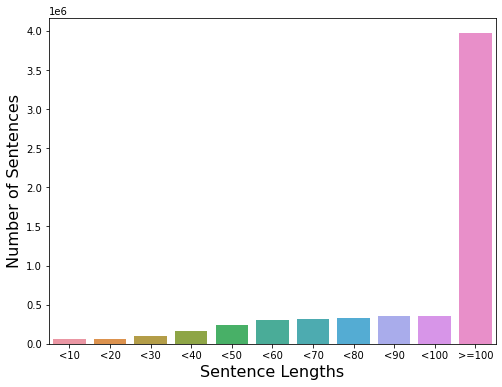

<Figure size 432x288 with 0 Axes>

In [36]:
import seaborn as sns
import pandas as pd


y_axis, y_value = [], []
for i in range(0, 10, 1):
    y_axis.append("<{}".format((i + 1) * 10))
    y_value.append(hist[i])
    
y_axis.append(">=100")
y_value.append(hist['large'])
# for key, value in hist.item():
    
df = pd.DataFrame({'y_axis': y_axis, 'y_value': y_value})

plt.figure(figsize=(8, 6))
splot=sns.barplot(x="y_axis",y="y_value",data=df)
plt.xlabel("Sentence Lengths", size=16)
plt.ylabel("Number of Sentences", size=16)


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('hist.pdf', dpi=100)


In [26]:
hist[1] / sum(hist.values())

0.008905656536298972

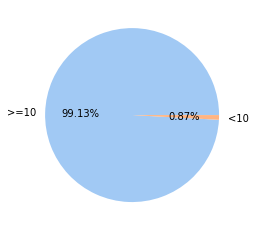

<Figure size 432x288 with 0 Axes>

In [56]:
labels = pievalue.keys()
sizes = pievalue.values()
explode = (0.0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=0)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

colors = sns.color_palette('pastel')[:2]

#create pie chart
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.2f%%')
# plt.xlabel("Distribution of Lengths of Sentence.", size=12)
# plt.ylabel("Number of Sentences", size=16)


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('pie.pdf', dpi=100)